 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_daily_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_daily_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_daily_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_daily_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_returns_csv = Path("Resources/sp500_history.csv")
sp500_returns_df = pd.read_csv(sp500_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_df.sort_index(inplace=True)
sp500_returns_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_returns_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_returns_df['Close'] = sp500_returns_df['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_returns_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.isnull().sum()
sp500_daily_returns.dropna(inplace=True)

In [13]:
# Rename Column
sp500_daily_returns.columns=['SP 500']
sp500_daily_returns.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [50]:
# Concatenate all DataFrames into a single DataFrame
all_portfolio_return = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
all_portfolio_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

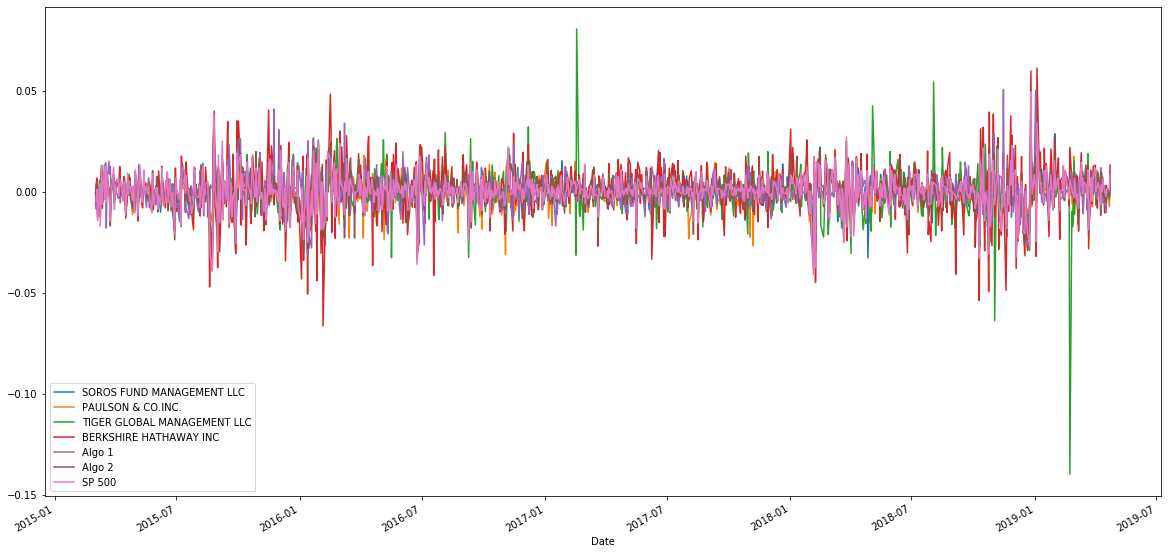

In [15]:
# Plot daily returns
all_portfolio_return.plot(figsize=(20,10))

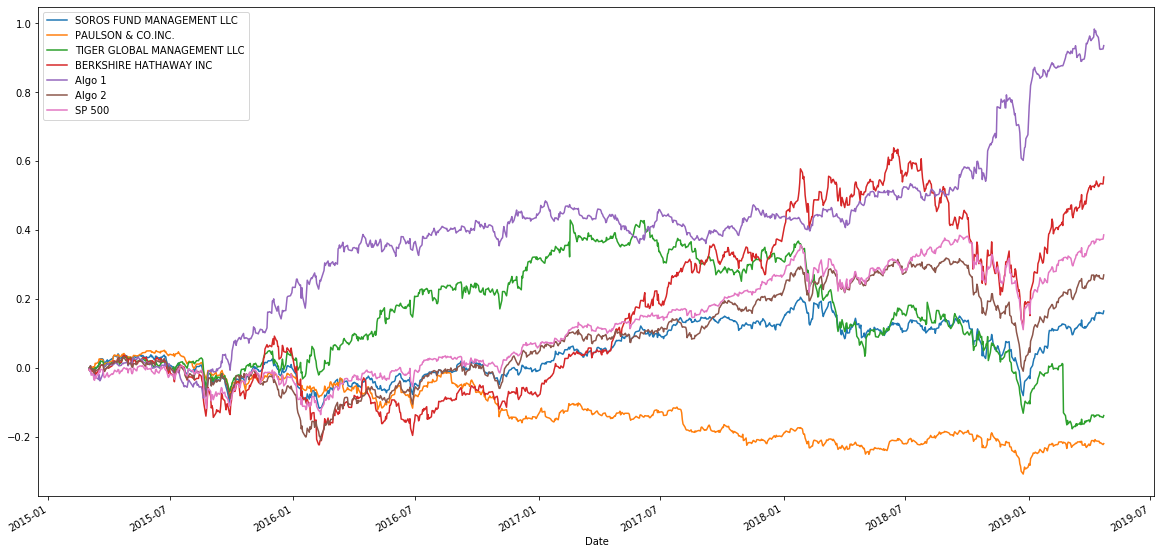

In [16]:
# Plot cumulative returns
cumulative_returns = (1 + all_portfolio_return.sort_index()).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

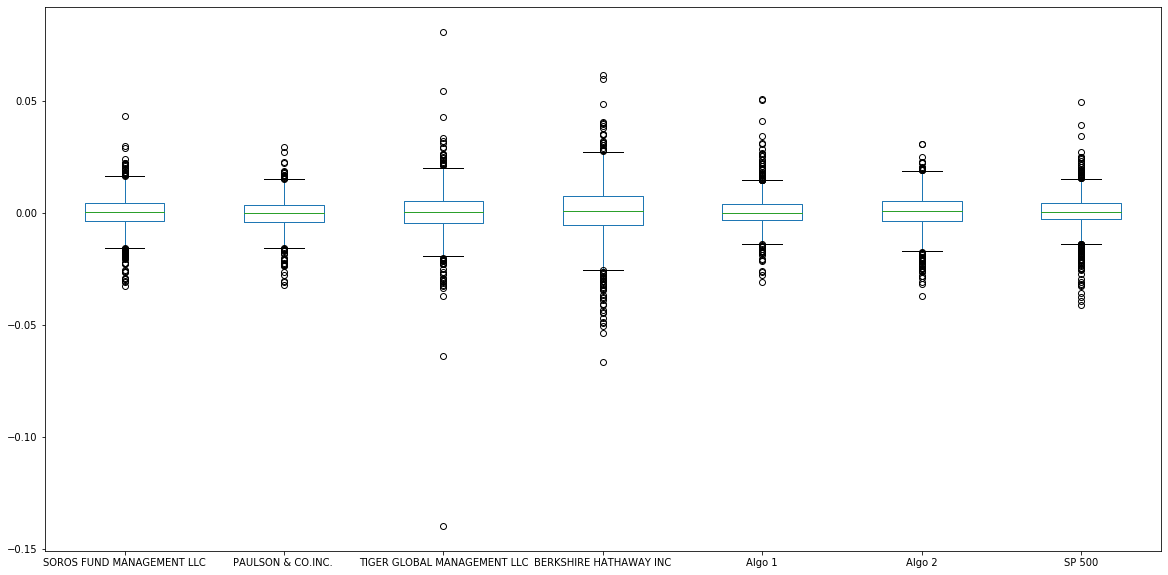

In [46]:
# Box plot to visually show risk
all_portfolio_return.plot.box(figsize=(20,10))

In [52]:
# Daily Standard Deviations

# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
all_portfolio_std = all_portfolio_return.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
dtype: float64

In [54]:
# Determine which portfolios are riskier than the S&P 500
all_portfolio_std[(all_portfolio_std['SP 500'] < all_portfolio_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [55]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

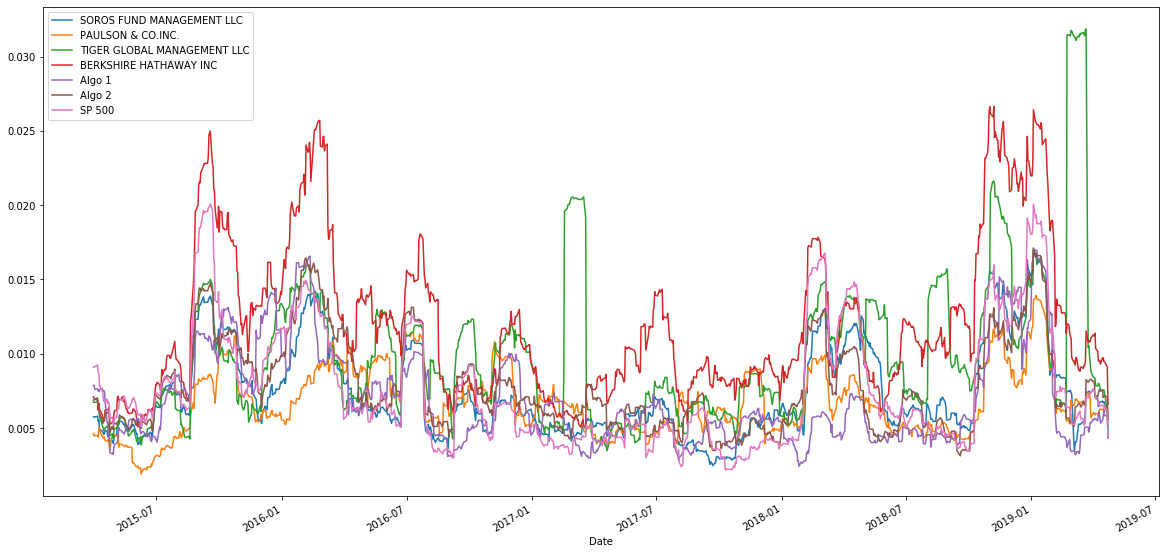

In [69]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
all_portfolio_return.rolling(window=21).std().plot(figsize=[20,10])

In [70]:
# Correlation
all_portfolio_return.corr() 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


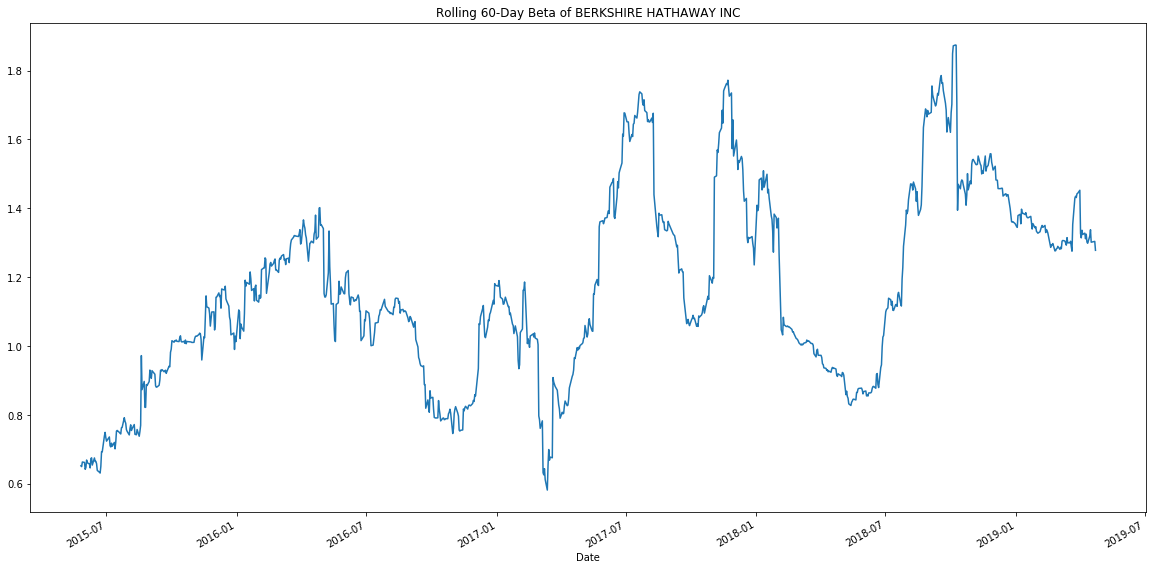

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&P 500
covariance_bh = all_portfolio_return['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_portfolio_return['SP 500'])
variance_sp500 = all_portfolio_return['SP 500'].rolling(window=60).var()
rolling_beta_bh = covariance_bh/variance_sp500
#rolling_beta_bh.head()
rolling_beta_bh.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollowing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [73]:
# (OPTIONAL) YOUR CODE HERE
all_portfolio_return.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [75]:
# Annualzied Sharpe Ratios
sharpe_ratios = (all_portfolio_return.mean() * 252) / (all_portfolio_return.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

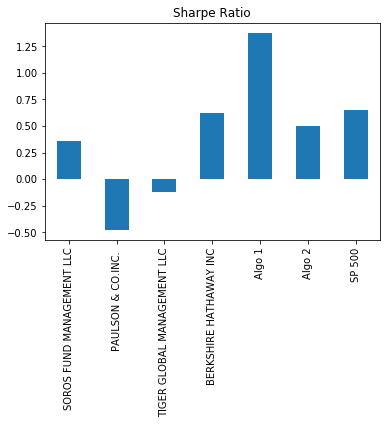

In [76]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [77]:
# Read the first stock
appl_path = Path('Resources/aapl_historical.csv')
appl_df = pd.read_csv(appl_path, index_col='Trade DATE', infer_datetime_format=True,  parse_dates=True, usecols=['Trade DATE','NOCP'])
appl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [78]:
# Read the second stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [79]:
# Read the third stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [80]:
# Concatenate all stocks into a single DataFrame
my_portfolio = pd.concat([appl_df, cost_df, goog_df], axis='columns', join='inner')
my_portfolio.columns = ['APPL', 'COST', 'GOOG']

my_portfolio_return = my_portfolio.sort_index().pct_change() 
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [81]:
# Reset the index
#my_portfolio_return.reset_index(inplace = True) 
#my_portfolio_return.reset_index(level =['Trade DATE'], inplace = True)

my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [82]:
# Drop Nulls
my_portfolio_return.dropna(inplace=True)
my_portfolio_return.head()

,APPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [84]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_portfolio = my_portfolio_return.dot(weights)
weighted_portfolio.sum()

0.14569723027355785

In [85]:
cumulative_returns1 = (1 + weighted_portfolio).cumprod()-1
cumulative_returns1.sum()

16.3150042358619

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
portfolio_return = pd.concat([weighted_portfolio, whale_daily_returns, sp500_daily_returns], axis='columns', join='inner')
portfolio_return.rename(columns={0:'MY PORTFOLIO'}, inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_return.dropna(inplace=True)
portfolio_return.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [92]:
# Risk
annual_portfolio_std = portfolio_return.std() * np.sqrt(252)
annual_portfolio_std

MY PORTFOLIO                   0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
SP 500                         0.152054
dtype: float64

In [95]:
# Rolling
portfolio_return.rolling(window=30).std().tail()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
2019-04-16,0.008764,0.006740,0.005751,0.007479,0.009869,0.006548
2019-04-17,0.008717,0.006539,0.005542,0.007362,0.009874,0.006415
2019-04-18,0.008226,0.006293,0.005513,0.006858,0.009057,0.006150
2019-04-22,0.007848,0.006340,0.005663,0.006895,0.008949,0.006107
2019-04-23,0.007033,0.005891,0.005624,0.006922,0.008608,0.005772


In [97]:
# Beta
covariance = portfolio_return['MY PORTFOLIO'].cov(portfolio_return['SP 500'])
variance = portfolio_return['SP 500'].var()
beta = covariance/variance
beta

1.2127120076458702

In [98]:
# Annualzied Sharpe Ratios
annual_portfolio_sharpe_ratio = (portfolio_return.mean() * 252)/(portfolio_return.std() * np.sqrt(252))
annual_portfolio_sharpe_ratio

MY PORTFOLIO                   0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
SP 500                         0.584820
dtype: float64

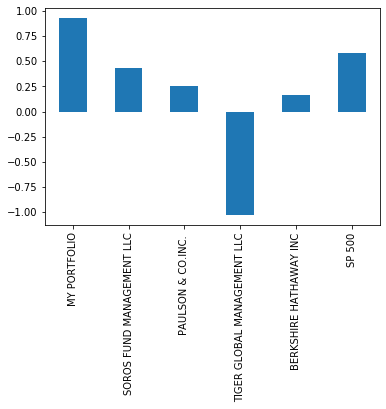

In [100]:
# Visualize the sharpe ratios as a bar plot
annual_portfolio_sharpe_ratio.plot.bar()

## Include correlation analysis to determine which stocks (if any) are correlated

In [101]:
correlation = portfolio_return.corr()
correlation

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP 500
MY PORTFOLIO,1.000000,0.733250,0.644210,0.391972,0.801158,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.852303
SP 500,0.871875,0.876981,0.766680,0.481030,0.852303,1.000000


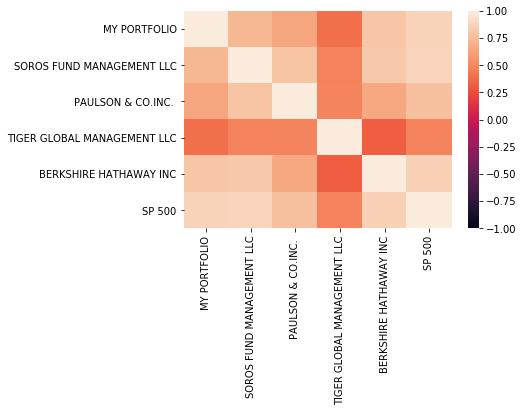

In [102]:
sns.heatmap(correlation, vmin=-1, vmax=1)

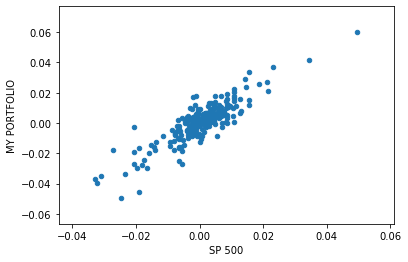

In [103]:
portfolio_return.plot(kind='scatter', x='SP 500', y='MY PORTFOLIO')